In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df = pd.read_csv('exp.csv', index_col=False)
df['ratio'] = df['computation_time'] / df['communication_time']
# df = df.query('img_name=="index.csv"')
df = df.query('img_name=="8049.csv"')
p1 = df.query('P==1')['tot_time'].values[0]
df['speed_up'] = p1 / df['tot_time']
df = df.rename(columns={'tot_time':'total time (second)'})

df['efficiency'] = df['speed_up'] / df['P']

df

,P,total time (second),communication_time,computation_time,img_name,ratio,speed_up,efficiency
0,1,13.149863,NaN,NaN,8049.csv,NaN,1.000000,1.000000
1,2,8.437029,0.000604,8.436640,8049.csv,13967.947020,1.558589,0.779295
2,4,1.859047,0.001741,1.857719,8049.csv,1067.041356,7.073443,1.768361
3,8,0.587424,0.002392,0.585704,8049.csv,244.859532,22.385641,2.798205
4,16,0.206824,0.002891,0.204787,8049.csv,70.836043,63.579967,3.973748
5,32,0.205632,0.002606,0.203586,8049.csv,78.122026,63.948525,1.998391
6,64,0.210648,0.003427,0.208659,8049.csv,60.886781,62.425767,0.975403
7,128,0.175258,0.004246,0.172742,8049.csv,40.683467,75.031456,0.586183


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


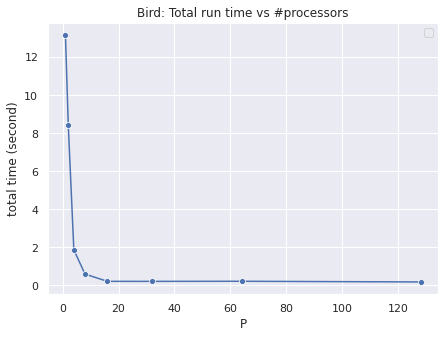

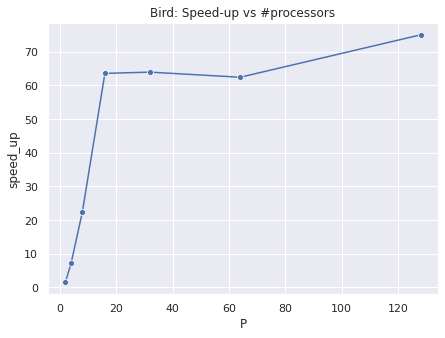

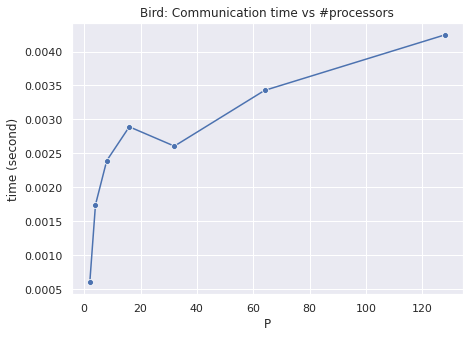

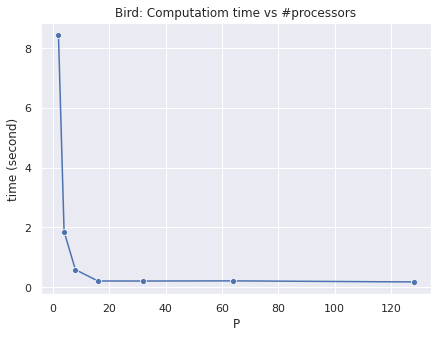

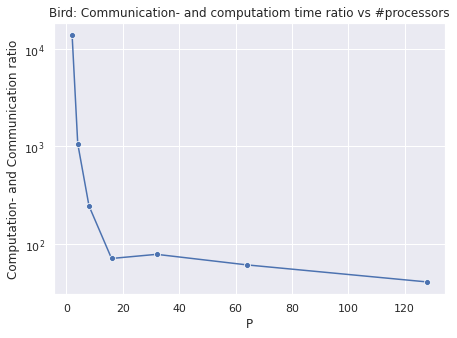

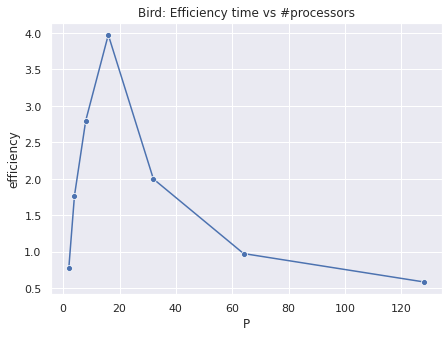

In [43]:
HEIGHT, LENGHT =7, 5
# Total_time curve
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Total run time vs #processors')
sns.set_theme()
sns.lineplot(data=df, x='P', y='total time (second)', marker='o')
plt.legend()
plt.savefig('figures/img8049_total_time.png')

# Speed-up
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Speed-up vs #processors')
sns.set_theme()
sns.lineplot(data=df.dropna(), x='P', y='speed_up', marker='o')
plt.savefig('figures/img8049_speed_up.png')

# computation/communication
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Communication time vs #processors')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df.dropna(), x='P', y='communication_time', marker='o')
plt.savefig('figures/img8049_comm.png')

# computation/communication
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Computatiom time vs #processors')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df.dropna(), x='P', y='computation_time', marker='o')
plt.savefig('figures/img8049_comp.png')

# computation/communication ratio
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Communication- and computatiom time ratio vs #processors')
plt.ylabel('Computation- and Communication ratio')
sns.set_theme()
sns.lineplot(data=df.dropna(), x='P', y='ratio', marker='o').set(yscale='log')
plt.savefig('figures/img8049_comp_comm_ratio.png')

# Efficiency
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Efficiency time vs #processors')
sns.set_theme()
sns.lineplot(data=df.dropna(), x='P', y='efficiency', marker='o')
plt.savefig('figures/img8049_efficiency.png')

In [38]:
df = pd.read_csv('startup.csv', index_col=False)

print(df.round(5).to_latex(index=False, header=True, bold_rows=True))

\begin{tabular}{rrrrrlr}
\toprule
 P &  tot\_time &  communication\_time &  computation\_time &  startup &       img\_name &      px \\
\midrule
64 &   0.15253 &             0.00302 &           0.14952 &  0.00069 &  index\_down\_10 &   28085 \\
64 &   0.22985 &             0.00352 &           0.22723 &  0.00078 &  index\_down\_20 &  111930 \\
64 &   0.35521 &             0.00392 &           0.35213 &  0.00098 &  index\_down\_30 &  251740 \\
64 &   0.72697 &             0.00516 &           0.72303 &  0.00134 &  index\_down\_40 &  447174 \\
64 &   1.17692 &             0.00382 &           1.17365 &  0.00152 &  index\_down\_50 &  699392 \\
64 &   2.22526 &             0.00471 &           2.22145 &  0.00205 &  index\_down\_60 & 1007780 \\
64 &   3.66111 &             0.00565 &           3.65639 &  0.00285 &  index\_down\_70 & 1370904 \\
64 &   5.77191 &             0.00662 &           5.76612 &  0.00351 &  index\_down\_80 & 1790334 \\
64 &   9.09473 &             0.00787 &           9.0883

<ipython-input-38-3474ca4014dc>:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.round(5).to_latex(index=False, header=True, bold_rows=True))


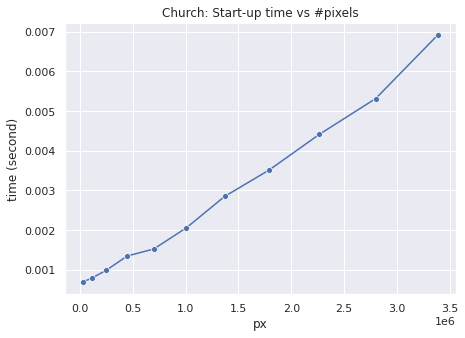

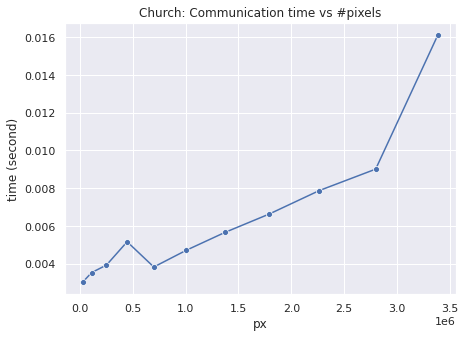

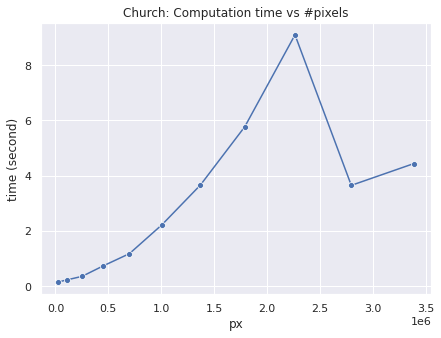

In [39]:
# 
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Church: Start-up time vs #pixels')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df, x='px', y='startup', marker='o')
plt.savefig('figures/img_index_starup.png')

plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Church: Communication time vs #pixels')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df, x='px', y='communication_time', marker='o')
plt.savefig('figures/img_index_communication.png')

plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Church: Computation time vs #pixels')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df, x='px', y='computation_time', marker='o')
plt.savefig('figures/img_index_computation.png')